# Directed Graph API

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - neighbors is the list of node objects
        """
        self.name = name
        self.neighbors = [] # list of node objects (not just names)
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [node_s.name for node_s in self.neighbors]
      
        
class digraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s,t in elist] + [t for s,t in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, s: str,t:str):
        """directed Edge"""
        self.nodes[s].neighbors.append(self.nodes[t])
    
    def create_graph(self):
        for s,t in self.elist:
             self.add_edge(s,t)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(20,10))
        nx.draw(G, node_size=900, node_color=color, with_labels=True)
             

{'B': [],
 'F': ['D'],
 'D': [],
 'E': ['D'],
 'C': ['D', 'B'],
 'A': ['B', 'C', 'E']}

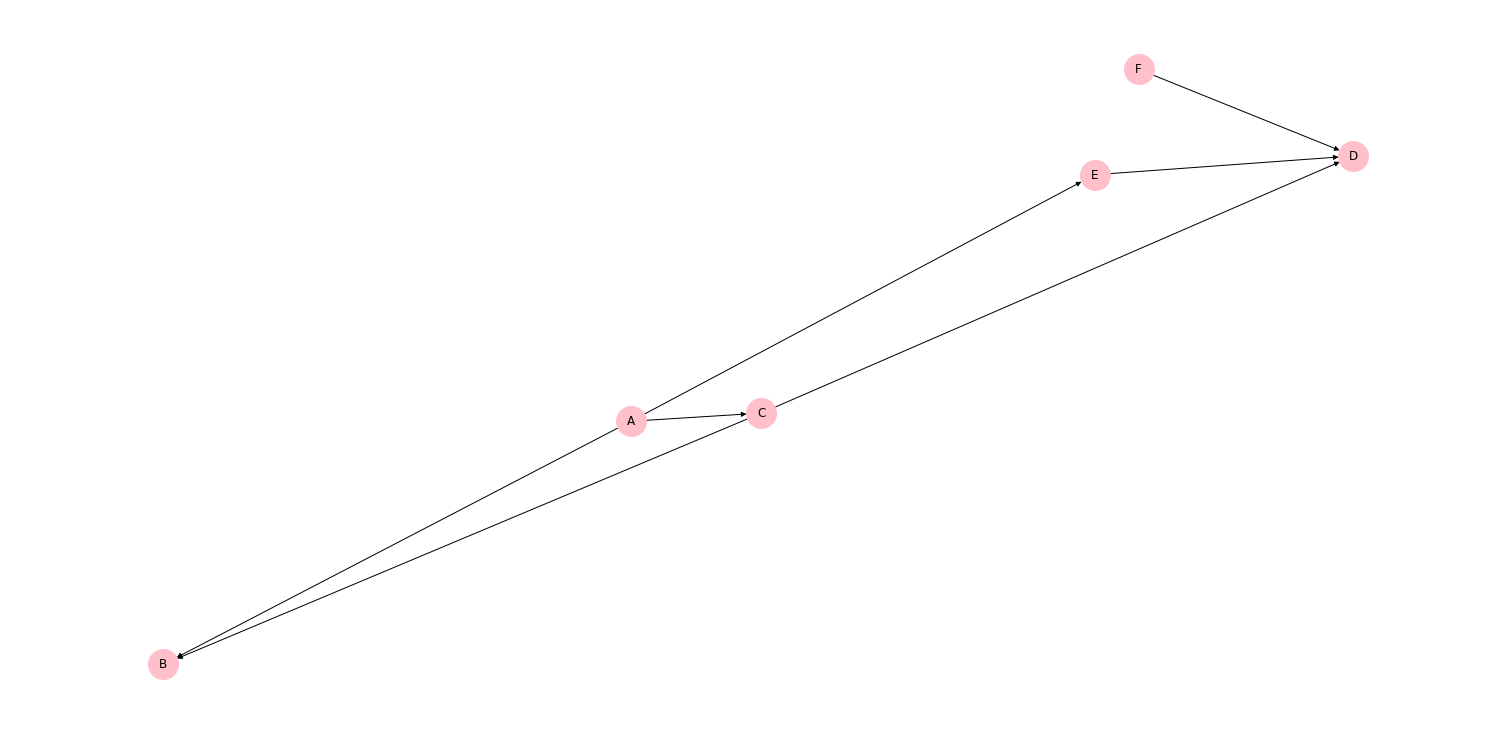

In [2]:
elist = [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'B'), ('E', 'D'), ('F', 'D'), ('A', 'E')]
G = digraph(elist)
G.draw('pink')
G.info()

In [3]:
node.neighbors_name?

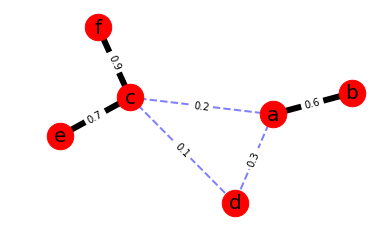

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

#nx.draw_networkx_edge_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [5]:
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('a', 'd'), ('c', 'd'), ('c', 'e'), ('c', 'f')])

In [6]:
G.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 0.6}), ('a', 'c', {'weight': 0.2}), ('a', 'd', {'weight': 0.3}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7}), ('c', 'f', {'weight': 0.9})])

In [7]:
G['a']['b']['weight']

0.6

# Directed Weighted Graphs

In [8]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight
        
    def __str__(self):
        return "{} -({})-> {}".format(self.s,self.weight,self.t)

class node():
    def __init__(self, name: str):
        """
         - node has a name (str)
         - DIFFERENTLY neighbors is the list of edge objects
        """
        self.name = name
        self.neighbors = [] # list of edge objects !!
        
    def neighbors_name(self) -> list:
        """
        info about neighbors names (returns list of strings)
        """
        return [(e.t, e.weight) for e in self.neighbors]
      
        
class weightedDiGraph():
    def __init__(self, elist: list):
        """
            self.nodes is a dictionary
                key   : node name
                value : node object
        """
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, e:edge):
        """directed Edge"""
        self.nodes[e.s].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
                
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'orange'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_weighted_edges_from(self.elist)
        plt.figure(figsize=(20,10))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=2000, node_color=color, font_size=40, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=20,  edge_labels = nx.get_edge_attributes(G,'weight'))


             

In [9]:
elist = [('A', 'B', 5), ('A', 'H', 8), ('A', 'E', 9), ('B', 'H', 4), ('B', 'C', 12), ('B', 'D', 15),
        ('C', 'D', 3), ('C', 'G', 11), ('D', 'G', 9), 
        ('E', 'H', 5),('E', 'F', 4),('E', 'G', 20),
         ('F', 'C', 1),('F', 'G', 13),
         ('H', 'C', 7),('H', 'F', 6)]

In [10]:
G = weightedDiGraph(elist)

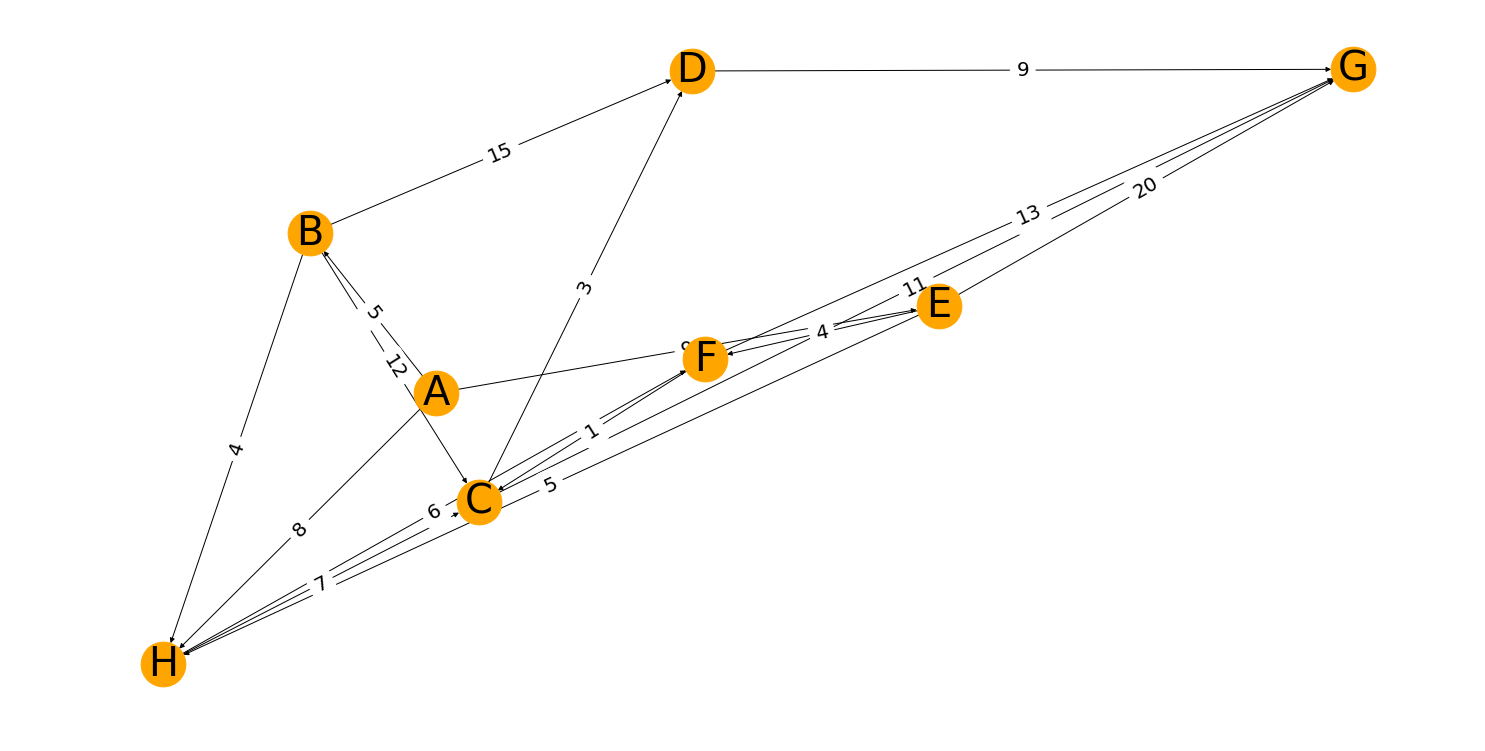

In [11]:
G.draw()

In [12]:
G.info()

{'B': [('H', 4), ('C', 12), ('D', 15)],
 'D': [('G', 9)],
 'F': [('C', 1), ('G', 13)],
 'E': [('H', 5), ('F', 4), ('G', 20)],
 'C': [('D', 3), ('G', 11)],
 'A': [('B', 5), ('H', 8), ('E', 9)],
 'H': [('C', 7), ('F', 6)],
 'G': []}

# Heapq Priority Queues
[source](https://stackoverflow.com/questions/3954530/how-to-make-heapq-evaluate-the-heap-off-of-a-specific-attribute)

> According to the example from the documentation, you can use tuples, and it will sort by the first element of the tuple:

[source 2](https://towardsdatascience.com/data-structure-heap-23d4c78a6962)

In [13]:
from heapq import *

h = []
heappush(h, (5, 'write code'))
heappush(h, (7, 'release product'))
heappush(h, (1, 'write spec'))
heappush(h, (3, 'create tests'))
heappush(h, (0, 'wake up'))

In [14]:
h

[(0, 'wake up'),
 (1, 'write spec'),
 (5, 'write code'),
 (7, 'release product'),
 (3, 'create tests')]

In [15]:
heappop(h)

(0, 'wake up')

In [16]:
h

[(1, 'write spec'),
 (3, 'create tests'),
 (5, 'write code'),
 (7, 'release product')]

# Shortest Path

In [17]:
from heapq import *

class SP():
    def __init__(self, G:weightedDiGraph, s: str):
        """
        Dijkstra Algoritm for Shortest Paths starting from source node s in graph G
        """
        self.G = G
        self.edgeTo = {n: None for n in G.node_names} # n: name of the node
        self.distTo = {n: float("inf") for n in G.node_names}
        # initially distance to every vertex is +inf, except source vertex s
        self.distTo[s] = 0
        
        self.pq = [] # Priority Queue
        heappush(self.pq, (self.distTo[s], s)) # Add vertex v to priority queue with priority distTo[v]
        while self.pq:
            distance, v = heappop(self.pq) # pop a vertex
            for e in self.G.nodes[v].neighbors:
                self.relax(e)
                
    def relax(self, e:edge):
        s, t, weight = e.s, e.t, e.weight
        if self.distTo[s] + weight < self.distTo[t]:
            self.distTo[t] = self.distTo[s] + weight
            heappush(self.pq, (self.distTo[t], t))
            self.edgeTo[t] = e
          

In [18]:
sp = SP(G, s = 'A')
{n:str(sp.edgeTo[n]) for n in sp.edgeTo.keys()}

{'B': 'A -(5)-> B',
 'D': 'C -(3)-> D',
 'F': 'E -(4)-> F',
 'E': 'A -(9)-> E',
 'C': 'F -(1)-> C',
 'A': 'None',
 'H': 'A -(8)-> H',
 'G': 'C -(11)-> G'}

In [19]:
sp.distTo

{'B': 5, 'D': 17, 'F': 13, 'E': 9, 'C': 14, 'A': 0, 'H': 8, 'G': 25}

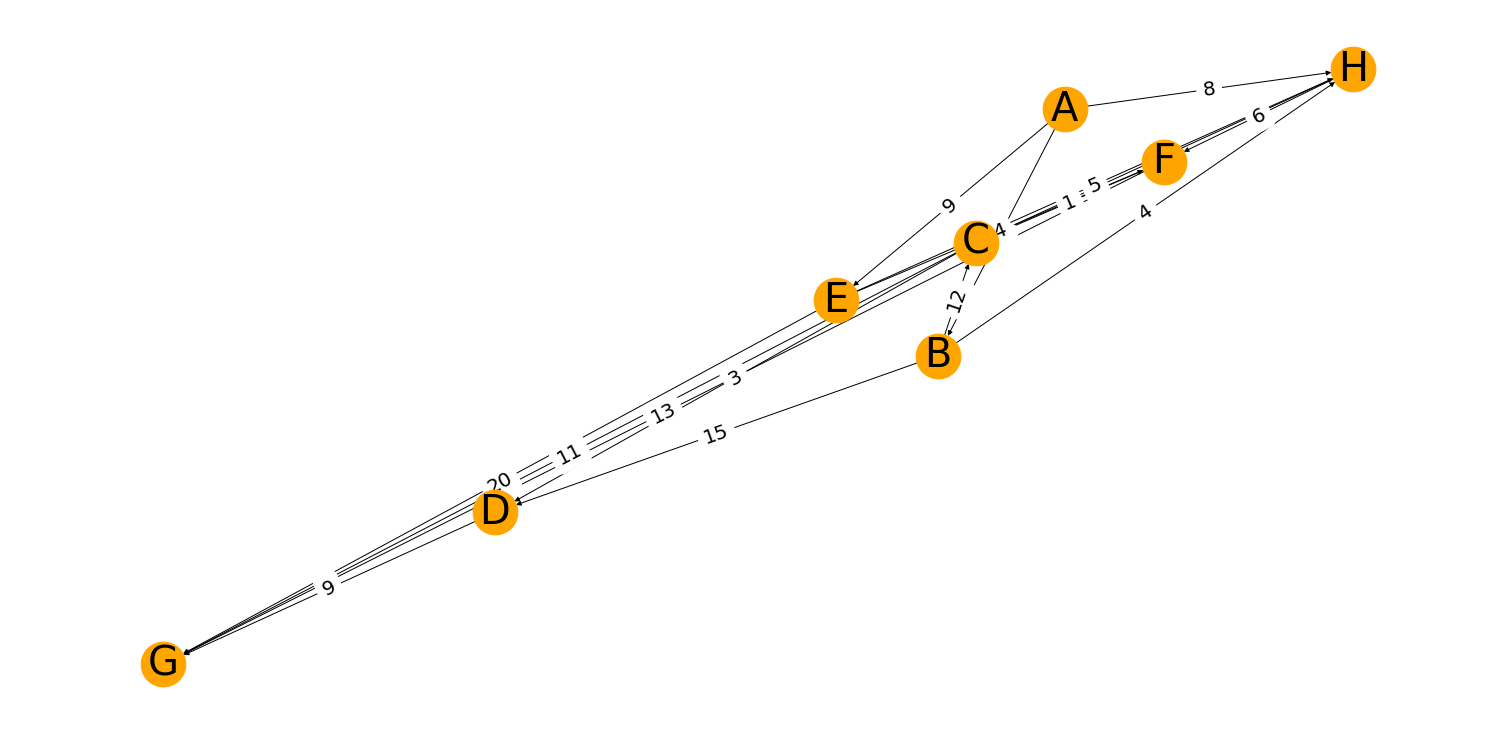

In [20]:
sp.G.draw()

# Get the shortest path 
to G from A

In [21]:
sp.edgeTo

{'B': <__main__.edge at 0xa163a1860>,
 'D': <__main__.edge at 0xa163a1438>,
 'F': <__main__.edge at 0xa163a10f0>,
 'E': <__main__.edge at 0xa163a12b0>,
 'C': <__main__.edge at 0xa163a1080>,
 'A': None,
 'H': <__main__.edge at 0xa163a1898>,
 'G': <__main__.edge at 0xa163a1828>}

In [22]:
t = 'G'
path = [t]
e = sp.edgeTo[t]
str(e)

'C -(11)-> G'

In [23]:
t = 'G'
path = [t]
e = sp.edgeTo[t]
while e: 
    new_t = e.s
    path.append(new_t)
    e = sp.edgeTo[e.s]

In [24]:
path

['G', 'C', 'F', 'E', 'A']

In [25]:
path[::-1]

['A', 'E', 'F', 'C', 'G']

In [26]:
path[::1]

['G', 'C', 'F', 'E', 'A']

In [27]:
edge?